In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
nltk.download(['punkt','wordnet','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
#libraries NLP


In [57]:
#import du csv
df = pd.read_csv('/content/drive/MyDrive/machine_learning/PARTIEL_ML/allocine_forrest_avis.csv')

## Analyse descriptive


In [58]:
df.head()

,Note,Description,Date,nombre_good_bad,nombre_follow,key
0,"5,0",Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155\n \n\n \n\n \n \n ...,Suivre son activité,0
1,"4,5",Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,42\n \n\n \n\n \n \n ...,Suivre son activité,1
2,"5,0","Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,39\n \n\n \n\n \n \n ...,Suivre son activité,2
3,"5,0","Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,46\n \n\n \n\n \n \n ...,Suivre son activité,3
4,"5,0",Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,28\n \n\n \n\n \n \n ...,Suivre son activité,4


In [59]:
df.sample(30)

,Note,Description,Date,nombre_good_bad,nombre_follow,key
129,"4,0",dingue...\r\nune superbe balade ...on ne s enn...,Publiée le 6 février 2009,1\n \n\n \n\n \n \n ...,Suivre son activité,4
712,"5,0",Il y a toujours un rôle qui s'adapte parfaitem...,Publiée le 8 avril 2009,0\n \n\n \n\n \n \n ...,Suivre son activité,0
1529,"4,5",Film tout simplement parfait! Le scénario est ...,Publiée le 27 avril 2020,0\n \n\n \n\n \n \n ...,Suivre son activité,0
1506,"5,0",C'est un film culte que tout le monde devrait ...,Publiée le 20 juillet 2011,0\n \n\n \n\n \n \n ...,Suivre son activité,0
560,"5,0",Un très beau film où Tom Hanks démontre l'imme...,Publiée le 22 février 2008,0\n \n\n \n\n \n \n ...,Suivre son activité,6
1245,"5,0",Une véritable leçon de vie qui nous entraîne d...,Publiée le 10 janvier 2007,0\n \n\n \n\n \n \n ...,Suivre son activité,10
416,"2,5",Je ne sais pas comment j'ai véritablement trou...,Publiée le 6 mars 2009,0\n \n\n \n\n \n \n ...,Suivre son activité,4
1840,"5,0","Un film sublime, vraiment très émouvant.",Publiée le 19 avril 2008,0\n \n\n \n\n \n \n ...,Suivre son activité,9
1211,"5,0","Film magnifique \nTout y est. Scénario riche, ...",Publiée le 13 janvier 2016,0\n \n\n \n\n \n \n ...,Suivre son activité,6
702,"5,0",Peut-être faudrait-il pour comprendre une exis...,Publiée le 1 mars 2018,0\n \n\n \n\n \n \n ...,Suivre son activité,4


In [60]:
df.info()
# 2009 lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Note             2009 non-null   object
 1   Description      2009 non-null   object
 2   Date             2009 non-null   object
 3   nombre_good_bad  2009 non-null   object
 4   nombre_follow    2009 non-null   object
 5   key              2009 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 94.3+ KB


In [61]:
df['Description'].duplicated().sum()

7

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
df.isna().sum()
# pas de valeur nulles

Note               0
Description        0
Date               0
nombre_good_bad    0
nombre_follow      0
key                0
dtype: int64

In [64]:
df.nunique()

Note                 10
Description        2002
Date               1484
nombre_good_bad      78
nombre_follow         1
key                  15
dtype: int64

In [65]:
# nombre follow ne contient qu'un type d'observation, on peut la supprimer
# on peut supprimer aussi la colonne key : inutile
df.drop(['nombre_follow', 'key'], axis=1, inplace=True)
df.head()

,Note,Description,Date,nombre_good_bad
0,"5,0",Forrest Gump de Robert Zemeckis (réalisateur d...,Publiée le 8 avril 2013,155\n \n\n \n\n \n \n ...
1,"4,5",Une immense rèussite du cinèma hollywoodien! R...,Publiée le 25 juillet 2019,42\n \n\n \n\n \n \n ...
2,"5,0","Le matin, quand il fait bon et beau, normal qu...",Publiée le 18 juillet 2014,39\n \n\n \n\n \n \n ...
3,"5,0","Un film immense, rempli de poésie et de bons s...",Publiée le 13 juin 2010,46\n \n\n \n\n \n \n ...
4,"5,0",Un très grand film . Ce film suit la vie sur p...,Publiée le 18 août 2014,28\n \n\n \n\n \n \n ...


In [66]:
df.drop(['nombre_good_bad'], axis=1, inplace=True)

In [67]:
# On transforme la colonne nombre_good_bad en int
#df['nombre_good_bad'] = df['nombre_good_bad'].apply(lambda x: re.sub('[^0-9]',' ',x))
#df['nombre_good'] = df['nombre_good_bad'].apply(lambda x: x.strip())
#df.drop(['nombre_good_bad'], axis=1, inplace=True)
#df.head()

In [68]:
# on transforme note en float
df['Note'] = df['Note'].apply(lambda x: x.replace(',', '.'))
df['Note'] = df['Note'].apply(lambda x: float(x))

In [69]:
df['date_year'] = df['Date'].map(lambda x: int(x[-4:]))
df.drop(['Date'], axis=1, inplace=True)

In [70]:
df.head()

,Note,Description,date_year
0,5.0,Forrest Gump de Robert Zemeckis (réalisateur d...,2013
1,4.5,Une immense rèussite du cinèma hollywoodien! R...,2019
2,5.0,"Le matin, quand il fait bon et beau, normal qu...",2014
3,5.0,"Un film immense, rempli de poésie et de bons s...",2010
4,5.0,Un très grand film . Ce film suit la vie sur p...,2014


In [71]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Note,2009.0,4.659034,0.750809,0.5,4.5,5.0,5.0,5.0
date_year,2009.0,2012.406670,4.023261,2006.0,2009.0,2012.0,2015.0,2021.0


## Visualisations

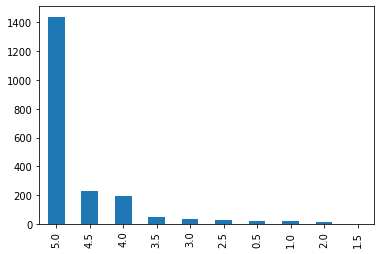

In [72]:
df['Note'].value_counts().plot(kind='bar')

In [40]:
df['Note'].value_counts()

5.0    1440
4.5     227
4.0     191
3.5      46
3.0      31
2.5      27
0.5      16
1.0      16
2.0      13
1.5       2
Name: Note, dtype: int64

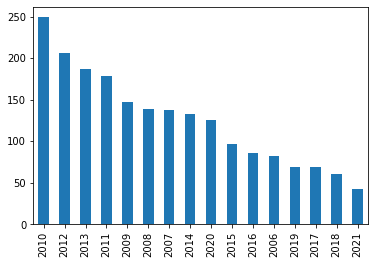

In [41]:
df['date_year'].value_counts().plot(kind='bar')

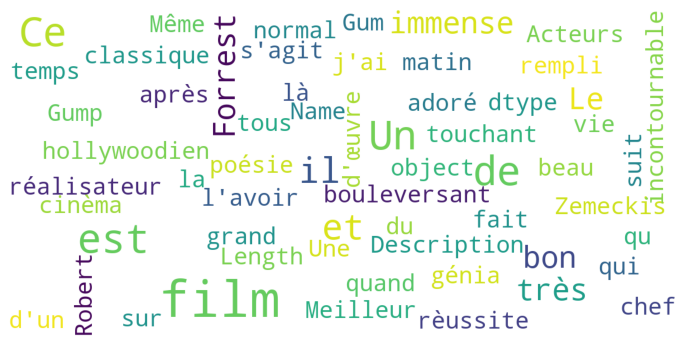

In [42]:
#nuage de mots
cloud = df
from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations = False,
        background_color='white',
        #stopwords=french_stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['Description'])

### En fonction de l’étape précédente construire une variable cible binaire grâce à la variable note

In [43]:
# comme je divise en 2 et que le nombre de note = 5 est très grand, je considère la mauvaise critique à partir de 4,5
df['Note_binary'] = df['Note'].apply(lambda x: 1 if x >= 4.5 else 0)

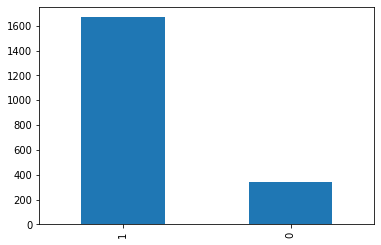

In [44]:
df['Note_binary'].value_counts().plot(kind='bar')

## Preprocessing

In [45]:
# on supprime la ponctuation et les chiffres
df['Description'] = df['Description'].map(lambda x : re.sub('[,\.!?)()]', '', x))\
.map(lambda x : re.sub('\d', '', x))

In [46]:
#2 Tokenization
df['Description'] = df.apply(lambda row: word_tokenize(row['Description']), axis=1)

In [47]:
#3 suppression des stop-words
french_stopwords = stopwords.words('french')
df['Description'] = df.Description.apply(lambda x: [item for item in x if item not in french_stopwords])

In [48]:
#4 Stemming
stemmer = SnowballStemmer('french')
df['Description'] = df.Description.apply(lambda x: [stemmer.stem(item) for item in x])

In [49]:
df.head()

,Note,Description,date_year,Note_binary
0,5.0,"[forrest, gump, robert, zemeck, réalis, trilog...",2013,1
1,4.5,"[une, immens, rèussit, cinem, hollywoodien, ro...",2019,1
2,5.0,"[le, matin, quand, fait, bon, beau, normal, qu...",2014,1
3,5.0,"[un, film, immens, rempl, poes, bon, sent, san...",2010,1
4,5.0,"[un, tres, grand, film, ce, film, suit, vi, pl...",2014,1


In [50]:
# definition de la variable cible word_count
df['word_count'] = df['Description'].apply(lambda x: len(x))

In [51]:
df.head()

,Note,Description,date_year,Note_binary,word_count
0,5.0,"[forrest, gump, robert, zemeck, réalis, trilog...",2013,1,242
1,4.5,"[une, immens, rèussit, cinem, hollywoodien, ro...",2019,1,137
2,5.0,"[le, matin, quand, fait, bon, beau, normal, qu...",2014,1,640
3,5.0,"[un, film, immens, rempl, poes, bon, sent, san...",2010,1,55
4,5.0,"[un, tres, grand, film, ce, film, suit, vi, pl...",2014,1,356


## 2) Modélisation 1 : La note

In [52]:
# TF*IDF pour les mots les plus representatifs
vectorizer = TfidfVectorizer()
list_de_mots = [" ".join(strings) for strings in df['Description']]
matrix = vectorizer.fit_transform(list_de_mots).todense()
matrix = pd.DataFrame(matrix, columns = vectorizer.get_feature_names())

top_words = matrix.sum(axis = 0).sort_values(ascending = False)
top_words

film         164.623746
un           118.046506
hank          81.707188
tom           80.971118
tout          77.535461
                ...    
promeneur      0.042822
bleu           0.042822
attrist        0.042822
oiseau         0.042822
quarti         0.042822
Length: 6072, dtype: float64

In [53]:
# Il faut faire le count vectorizer 
# pour ne rien risquer je fais une copie
df2 = df.copy()
df2['Description'] = df2['Description'].apply(lambda x: ' '.join(x))
CV = CountVectorizer()
CV.fit(df2['Description'])

X_train, X_test, y_train, y_test = train_test_split(df2['Description'], df['Note_binary'], test_size=0.2, random_state=42)

X_train_v = CV.transform(X_train)
X_test_v = CV.transform(X_test)
X_train_v
print(X_test_v.shape)

NameError: ignored

In [ ]:
#On choisit Bernoulli Naive Bayes car le choix est binaire (mauvaise ou bonne note)

bern_nb = BernoulliNB(binarize=True)
bern_nb.fit(X_train_v, y_train)
print(bern_nb)
y_pred = bern_nb.predict(X_test_v)

print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {mean_squared_error(y_test, y_pred, squared=False)}')

## 3) Modélisation 1 : Le nombre de mots

In [ ]:
from sklearn.linear_model import LinearRegression 

#reg = LinearRegression().fit(df[['date_year']], df['word_count'])
